# Introduction to pandas and scikit-learn

"pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python.
pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn." [Pandas Website](https://pandas.pydata.org/)

"Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
[Wikipedia: scikit-learn](https://en.wikipedia.org/wiki/Scikit-learn)

This introduction to pandas is based on Julia Evans comprehensive [Pandas Cookbook](https://github.com/jvns/pandas-cookbook).

In [3]:
## import libraries and adjust settings

import pandas as pd
import matplotlib.pyplot as plt

# Render our plots inline
%matplotlib inline

# set figure size
plt.rcParams['figure.figsize'] = (15, 8)


## pandas introduction

### Work with csv files
The read_csv() function has a lot of parameters to make adjustments such as:
- change the column separator to a ;
- Set the encoding to 'latin1' (the default is 'utf8')
- Parse the dates in the 'Date' column
- Announce that our dates have the day first instead of the month first
- Set the index to be the 'Date' column

In [4]:
df = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')

## df.head() also shows the first few rows
df.head()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN
2012-01-04,144,NaN,1,116,318,111,8,61,NaN
2012-01-05,197,NaN,2,124,330,97,13,95,NaN


### Handle dataframes

In [5]:
## drop a specific column by name
df.drop(['Brébeuf (données non disponibles)'], axis=1).head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,
2012-01-01,35,0,38,51,26,10,16,NaN
2012-01-02,83,1,68,153,53,6,43,NaN
2012-01-03,135,2,104,248,89,3,58,NaN
2012-01-04,144,1,116,318,111,8,61,NaN
2012-01-05,197,2,124,330,97,13,95,NaN


In [6]:
## drop the columns where all elements are NaN
df.dropna(axis=1, how='all').head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [7]:
## drop the columns where at least 1 value is missing
df.dropna(axis=1, how='any').head()

,Berri 1,Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1
Date,,,,,,,
2012-01-01,35,0,38,51,26,10,16
2012-01-02,83,1,68,153,53,6,43
2012-01-03,135,2,104,248,89,3,58
2012-01-04,144,1,116,318,111,8,61
2012-01-05,197,2,124,330,97,13,95


In [8]:
## select a specific column
## .head() shows the first few rows, can take an integer as parameter
df['Berri 1'].head()

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64

In [9]:
## display statistics for the dataframe
df['Berri 1'].describe()

count     310.000000
mean     2985.048387
std      2169.271062
min        32.000000
25%       596.000000
50%      3128.000000
75%      4973.250000
max      7077.000000
Name: Berri 1, dtype: float64

### Plot your data

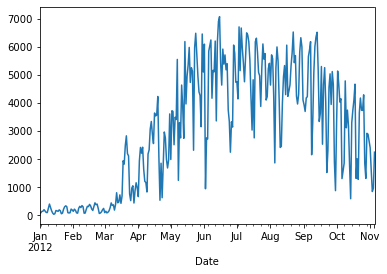

In [10]:
## plot it by just adding .plot()
df['Berri 1'].plot()

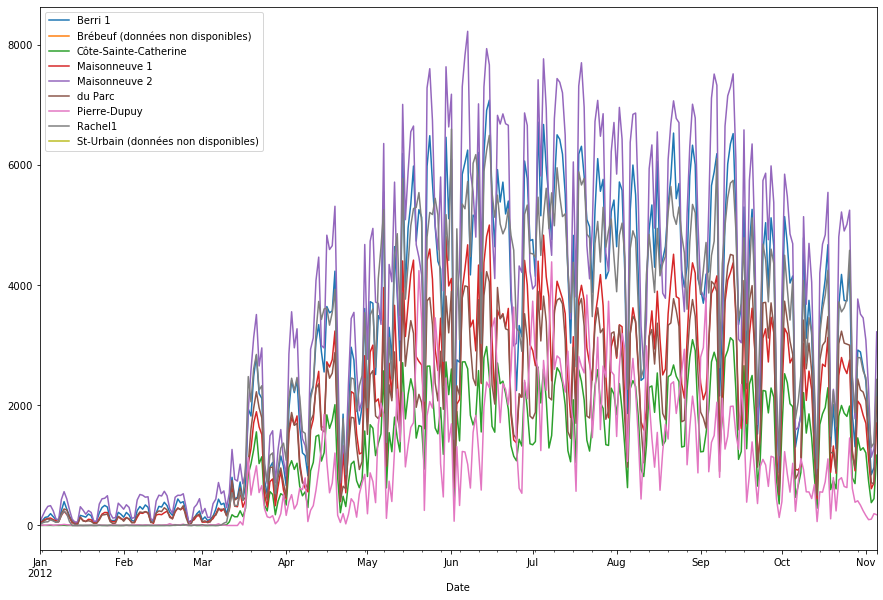

In [11]:
## plot the whole thing, making it a bit bigger
df.plot(figsize=(15, 10))

### Selecting and filtering data

In [1]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (15, 8)

complaints = pd.read_csv('data/311-service-requests.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
## shows the whole table
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"
5,26592370,10/31/2013 01:46:52 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Club/Bar/Restaurant,11372,37 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.749989,-73.881988,"(40.7499893014072, -73.88198770727831)"
6,26595682,10/31/2013 01:46:40 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11419,107-50 109 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.681533,-73.831737,"(40.68153278675525, -73.83173699701601)"
7,26595195,10/31/2013 01:44:19 AM,10/31/2013 01:58:49 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11417,137-09 CROSSBAY BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.671816,-73.843092,"(40.67181584567338, -73.84309181950769)"
8,26590540,10/31/2013 01:44:14 AM,10/31/2013 02:28:04 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,10011,258 WEST 15 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.739913,-74.000790,"(40.73991339303542, -74.00079028612932)"
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"


In [14]:
## Exercise!
## Please display just the single column 'Complaint Type'



0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

In [57]:
## Exercise!
## Please display the first 5 rows of the complete dataframe



0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [3]:
## display several columns

complaints[['Complaint Type', 'Borough']].head()

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN


In [4]:
## display counts for every complaint type
complaints['Complaint Type'].value_counts()

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
                          ...  
Open Flame Permit             1
Tunnel Condition              1
Ferry Permit                  1
DWD                           1
Trans Fat                     1
Name: Complaint Type, Length: 165, dtype: int64

In [5]:
## Exercise!
## display the top 10 complaint types



HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint Type, dtype: int64

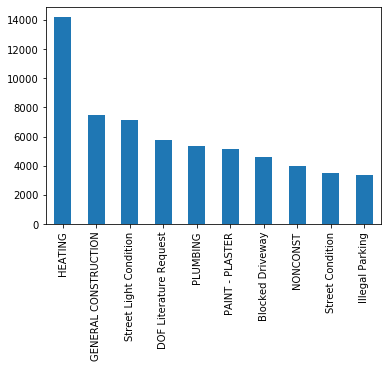

In [6]:
## Exercise!

## plot the top 10 complaints as a bar chart
## Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
bar_l=complaints['Complaint Type'].value_counts().head(10)
bar_l.plot.bar(10,5)


In [7]:
## find all the entries with a certain type of noise complaint
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


In [8]:
## decompose the statement above
## returns an array of true/false
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

In [9]:
## this way you can combine several conditions
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"


In [10]:
## Exercise!

## which borough has the most noise complaints




In [47]:
## Exercise!

## what is the percentage of noise complaints related to the number of all complaints in a borough


## Indexing and grouping

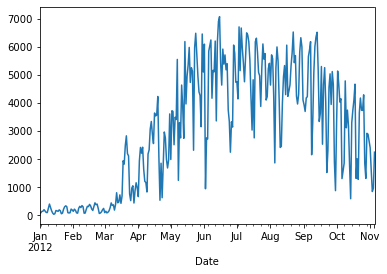

In [11]:
bikes = pd.read_csv('data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')
bikes['Berri 1'].plot()

In [12]:
## extract columns into a new dataframe
berri_bikes = bikes[['Berri 1']].copy()
berri_bikes.head(3)

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135


In [13]:
## have a look at the index
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [14]:
## the index can also display the day of the month
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5],
           dtype='int64', name='Date', length=310)

In [15]:
## or the day of the week
## 0 is monday
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0],
           dtype='int64', name='Date', length=310)

In [16]:
## add the weekday as column to the dataframe 
berri_bikes.loc[:,'weekday'] = berri_bikes.index.weekday
berri_bikes.head(3)

,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1


In [17]:
## group by and aggregate by the weekday
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


In [18]:
## change the index from numbers to weekdays
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


In [63]:
## Exercise!

## create a bar plot that shows the distribution of cyclists per day of the week



In [65]:
## Exercise!

## Calculate the average number of cyclists per day per month
## Reference: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

## Steps: 
## add the month of the index as a column to "berri bikes", just as we did with the weekday
## then group by month AND weekday and calculate the mean


# From pandas to scikit-learn

In [79]:
from pprint import pprint
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


attribute_names = ("Play", "Outlook", "Temp", "Humidity", "Windy")

data = [("No", "Sunny", "Hot", "High", "False"),
        ("No", "Sunny", "Hot", "High", "True"),
        ("Yes", "Overcast", "Hot", "High", "False"),
        ("Yes", "Rain", "Mild", "High", "False"),
        ("Yes", "Rain", "Cool", "Normal", "False"),
        ("No", "Rain", "Cool", "Normal", "True"),
        ("Yes", "Overcast", "Cool", "Normal", "True"),
        ("No", "Sunny", "Mild", "High", "False"),
        ("Yes", "Sunny", "Cool", "Normal", "False"),
        ("Yes", "Rain", "Mild", "Normal", "False"),
        ("Yes", "Sunny", "Mild", "Normal", "True"),
        ("Yes", "Overcast", "Mild", "High", "True"),
        ("Yes", "Overcast", "Hot", "Normal", "False"),
        ("No", "Rain", "Mild", "High", "True"),
       ]


new_data = ("?", "Rain", "Mild", "Normal", "False")


df = pd.DataFrame(data, columns=attribute_names)
df

,Play,Outlook,Temp,Humidity,Windy
0,No,Sunny,Hot,High,False
1,No,Sunny,Hot,High,True
2,Yes,Overcast,Hot,High,False
3,Yes,Rain,Mild,High,False
4,Yes,Rain,Cool,Normal,False
5,No,Rain,Cool,Normal,True
6,Yes,Overcast,Cool,Normal,True
7,No,Sunny,Mild,High,False
8,Yes,Sunny,Cool,Normal,False
9,Yes,Rain,Mild,Normal,False


In [67]:
## The label encoder creates a mapping for all Strings
le = LabelEncoder()
le.fit(["Yes", "No", "Sunny", "Overcast", "Rain", "Hot", "Mild", "Cool", "High", "Normal", "True", "False"])

## convert pandas dataframe to numpy array
np_data = df.values
pprint(np_data)

## Afterwards the data can be transformed with this mapping
scikit_data = np.array([le.transform(row) for row in np_data])
## also translate the new data 
scikit_predict = np.array(le.transform(new_data[1:]))

pprint(scikit_data)

array([['No', 'Sunny', 'Hot', 'High', 'False'],
       ['No', 'Sunny', 'Hot', 'High', 'True'],
       ['Yes', 'Overcast', 'Hot', 'High', 'False'],
       ['Yes', 'Rain', 'Mild', 'High', 'False'],
       ['Yes', 'Rain', 'Cool', 'Normal', 'False'],
       ['No', 'Rain', 'Cool', 'Normal', 'True'],
       ['Yes', 'Overcast', 'Cool', 'Normal', 'True'],
       ['No', 'Sunny', 'Mild', 'High', 'False'],
       ['Yes', 'Sunny', 'Cool', 'Normal', 'False'],
       ['Yes', 'Rain', 'Mild', 'Normal', 'False'],
       ['Yes', 'Sunny', 'Mild', 'Normal', 'True'],
       ['Yes', 'Overcast', 'Mild', 'High', 'True'],
       ['Yes', 'Overcast', 'Hot', 'Normal', 'False'],
       ['No', 'Rain', 'Mild', 'High', 'True']], dtype=object)
array([[ 5,  9,  3,  2,  1],
       [ 5,  9,  3,  2, 10],
       [11,  7,  3,  2,  1],
       [11,  8,  4,  2,  1],
       [11,  8,  0,  6,  1],
       [ 5,  8,  0,  6, 10],
       [11,  7,  0,  6, 10],
       [ 5,  9,  4,  2,  1],
       [11,  9,  0,  6,  1],
       [11,  8,  4

In [68]:
## Split the data to seperate the different values for the attributes and the associated class.
X = scikit_data[:, 1:5]
Y = scikit_data[:, 0]
print(X, Y)

[[ 9  3  2  1]
 [ 9  3  2 10]
 [ 7  3  2  1]
 [ 8  4  2  1]
 [ 8  0  6  1]
 [ 8  0  6 10]
 [ 7  0  6 10]
 [ 9  4  2  1]
 [ 9  0  6  1]
 [ 8  4  6  1]
 [ 9  4  6 10]
 [ 7  4  2 10]
 [ 7  3  6  1]
 [ 8  4  2 10]] [ 5  5 11 11 11  5 11  5 11 11 11 11 11  5]


In [69]:
## Split the data set into test and training data, for both X and Y
X_train, X_test, y_train, y_test = X[:12], X[12:], Y[:12], Y[12:]

## Build the Decision Tree and use entropy / information gain as the criterion to select the next attribute.
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=2)

clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [70]:
## Once the decision tree is built the additional example can be classified.
result = clf_entropy.predict(scikit_predict.reshape(1,-1))
print(le.inverse_transform(result))

## To measure the accuracy we use the test set and compare the predictions to the actual class labels.
y_pred_en = clf_entropy.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

['Yes']
Accuracy is  100.0


## Further Reading

- [Guilherme Samora - Pandas Exercises](https://github.com/guipsamora/pandas_exercises)
- [Tom Augspurger - Effective Pandas](https://github.com/TomAugspurger/effective-pandas)
- [Farhad Malik - Did you know Pandas can do so much](https://medium.com/fintechexplained/did-you-know-pandas-can-do-so-much-f65dc7db3051)
- [Ted Petrou - From Pandas to scikit learn](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62)
